In [1]:
import pandas as pd


df = pd.read_csv('../data/user_app_data.csv')

# Ver las primeras filas para inspeccionar el contenido
print(df.head())

   user_id  app_version platform  session_duration  number_of_sessions  \
0        1          1.2  Android               109                  11   
1        2          1.3  Android               116                  17   
2        3          1.0  Android                94                  13   
3        4          1.2      iOS                47                   1   
4        5          1.2      iOS                99                   2   

  country  user_feedback  
0  France              1  
1      UK              2  
2  France              5  
3  Canada              4  
4  Canada              3  


In [2]:
# Verificar la cantidad de filas duplicadas en el DataFrame
duplicated_rows = df.duplicated().sum()
print(f"Duplicados encontrados: {duplicated_rows}")

# Eliminar duplicados si los hay
df = df.drop_duplicates()
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")


Duplicados encontrados: 0
Número de filas después de eliminar duplicados: 300


In [4]:
# Verificar valores faltantes en el DataFrame
missing_values = df.isnull().sum()
print(f"Valores faltantes por columna:\n{missing_values}")


df = df.dropna()  # En este caso, eliminamos filas con valores faltantes
print(f"Número de filas después de eliminar filas con valores faltantes: {df.shape[0]}")


Valores faltantes por columna:
user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64
Número de filas después de eliminar filas con valores faltantes: 300


In [6]:
# Verificar tipos de datos
print("Tipos de datos iniciales:\n", df.dtypes)

# Ajustar tipos de datos si es necesario
df['user_id'] = df['user_id'].astype(int)
df['app_version'] = df['app_version'].astype(str)
df['platform'] = df['platform'].astype(str)
df['session_duration'] = df['session_duration'].astype(int)
df['number_of_sessions'] = df['number_of_sessions'].astype(int)
df['country'] = df['country'].astype(str)
df['user_feedback'] = df['user_feedback'].astype(int)

print("Tipos de datos después de ajustes:\n", df.dtypes)


Tipos de datos iniciales:
 user_id                 int64
app_version           float64
platform               object
session_duration        int64
number_of_sessions      int64
country                object
user_feedback           int64
dtype: object
Tipos de datos después de ajustes:
 user_id                int32
app_version           object
platform              object
session_duration       int32
number_of_sessions     int32
country               object
user_feedback          int32
dtype: object


In [7]:
# Normalizar la columna 'platform'
df['platform'] = df['platform'].str.capitalize()

# Revisar valores únicos en las columnas categóricas
print("Valores únicos en 'platform':", df['platform'].unique())
print("Valores únicos en 'country':", df['country'].unique())


Valores únicos en 'platform': ['Android' 'Ios']
Valores únicos en 'country': ['France' 'UK' 'Canada' 'Germany' 'Mexico' 'USA' 'Spain' 'Italy']


In [8]:
# Filtrar valores inusuales en 'session_duration' (por ejemplo, > 1000 minutos)
outliers = df[df['session_duration'] > 1000]
print("Valores inusuales en 'session_duration':\n", outliers)

# Para este análisis, eliminaremos los valores fuera de rango
df = df[df['session_duration'] <= 1000]


Valores inusuales en 'session_duration':
 Empty DataFrame
Columns: [user_id, app_version, platform, session_duration, number_of_sessions, country, user_feedback]
Index: []


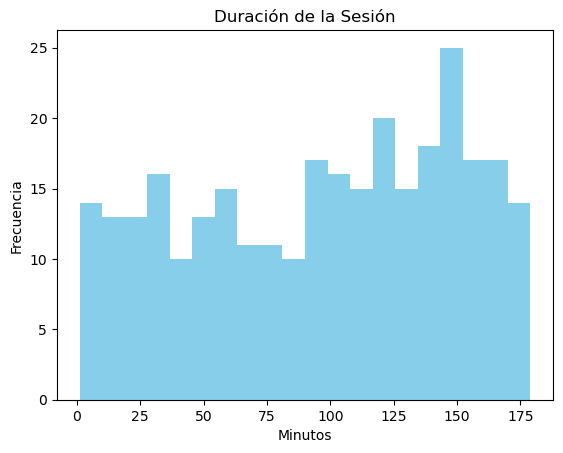

In [14]:
import matplotlib.pyplot as plt

plt.hist(df['session_duration'], bins=20, color='skyblue')
plt.title('Duración de la Sesión')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()


Interpretación: Este histograma muestra la distribución de la duración de las sesiones. Podemos observar si la mayoría de las sesiones son cortas o largas.

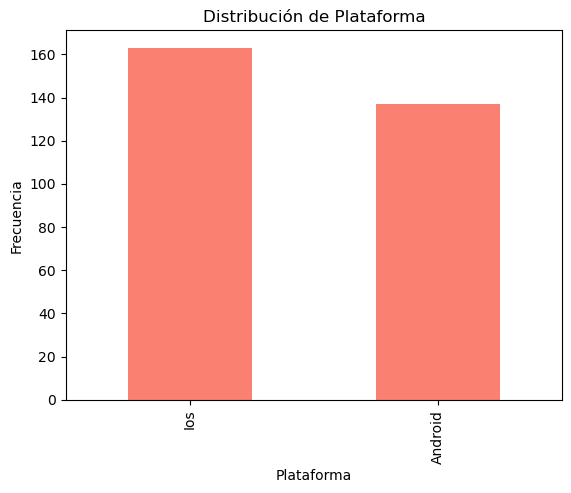

In [10]:
df['platform'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribución de Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Frecuencia')
plt.show()


Interpretación: Este gráfico nos da una visión de la popularidad de cada plataforma entre los usuarios.

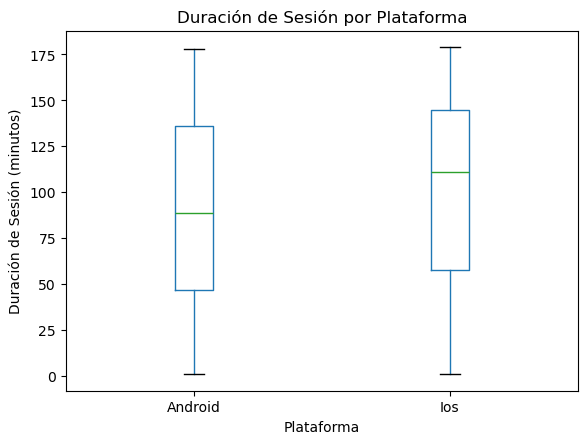

In [16]:

df.boxplot(column='session_duration', by='platform', grid=False)
plt.title('Duración de Sesión por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Duración de Sesión (minutos)')
plt.suptitle("")  # Esto elimina el título automático que añade Pandas
plt.show()


 El boxplot ayuda a comparar la duración de las sesiones entre plataformas y a identificar cualquier diferencia significativa.

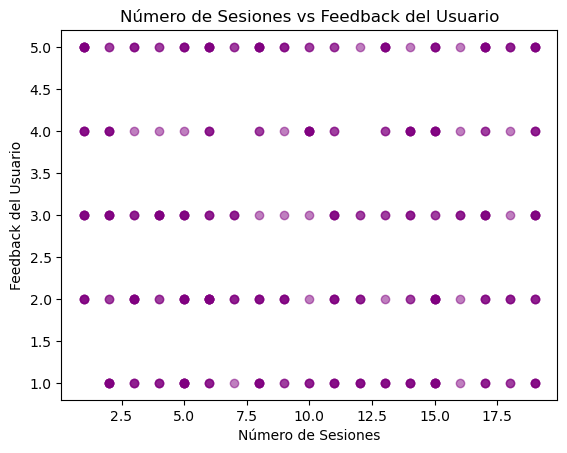

In [12]:
plt.scatter(df['number_of_sessions'], df['user_feedback'], color='purple', alpha=0.5)
plt.title('Número de Sesiones vs Feedback del Usuario')
plt.xlabel('Número de Sesiones')
plt.ylabel('Feedback del Usuario')
plt.show()
